# Cleaning transactions 2019

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import utils
from scipy.stats import zscore
from scipy import stats
import numpy as np

In [2]:
df = pd.read_csv('transactions-2019-utf8.csv', encoding='UTF-8', sep = '\t')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (17,18,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Date,Time,Time Zone,Gross Sales,Discounts,Net Sales,Gift Card Sales,Tax,Tip,Partial Refunds,...,Device Nickname,Deposit ID,Deposit Date,Deposit Details,Fee Percentage Rate,Fee Fixed Rate,Refund Reason,E-money,Discount Name,Transaction Status
0,12/31/19,13:56:36,Tokyo,¥308,¥0,¥308,¥0,¥24,¥0,¥0,...,Nawate Cafe 1,NaN,NaN,NaN,NaN,NaN,NaN,¥0,NaN,Complete
1,12/31/19,13:55:34,Tokyo,"¥1,225",¥0,"¥1,225",¥0,¥98,¥0,¥0,...,Nawate Cafe 3,NaN,NaN,NaN,NaN,NaN,NaN,¥0,NaN,Complete
2,12/31/19,13:50:27,Tokyo,¥168,¥0,¥168,¥0,¥13,¥0,¥0,...,Nawate Cafe 3,NaN,NaN,NaN,NaN,NaN,NaN,¥0,NaN,Complete
3,12/31/19,13:48:57,Tokyo,¥557,¥0,¥557,¥0,¥46,¥0,¥0,...,Nawate Cafe 3,3Z6XBTC4HG348YN7ZZBY12E74TQH,01/06/20,https://squareup.com/dashboard/sales/deposits/...,3.25,¥0,NaN,¥0,NaN,Complete
4,12/31/19,13:41:17,Tokyo,¥345,¥0,¥345,¥0,¥27,¥0,¥0,...,Nawate Cafe 1,NaN,NaN,NaN,NaN,NaN,NaN,¥0,NaN,Complete


In [4]:
# Time Optional column of time for future use
#df = df[['Date', 'Time', 'Total Collected']]

In [5]:
df = df[['Date', 'Total Collected']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48742 entries, 0 to 48741
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             48742 non-null  object
 1   Total Collected  48742 non-null  object
dtypes: object(2)
memory usage: 761.7+ KB


In [7]:
# Cleaning Date
df.Date=pd.to_datetime(df.Date)

In [8]:
# Cleaning Time
#df['Time'] = pd.to_timedelta(df['Time'], unit='s')

In [9]:
# Cleaning Total Collected
df['Total Collected'] = df['Total Collected'].str.replace('¥', '')
df['Total Collected'] = df['Total Collected'].str.replace(',', '')
df['Total Collected'] = df['Total Collected'].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48742 entries, 0 to 48741
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             48742 non-null  datetime64[ns]
 1   Total Collected  48742 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 761.7 KB


In [11]:
df.head()

,Date,Total Collected
0,2019-12-31,332
1,2019-12-31,1323
2,2019-12-31,181
3,2019-12-31,603
4,2019-12-31,372


In [12]:
# To delete returns 
df=df.drop(df[df['Total Collected'] < 0].index)

In [13]:
# Renaming
df.rename(columns={'Total Collected':'Total'}, inplace=True)

<Figure size 576x576 with 0 Axes>

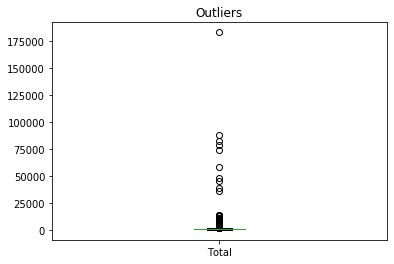

In [14]:
# Ploting outliers
plt.figure(figsize=(8,8))
df.plot.box()
plt.title('Outliers')
plt.show();

In [15]:
#Removing outliers
q1=np.percentile(df.Total, 25)
q3=np.percentile(df.Total, 75)

In [16]:
iqr=q3-q1

upper=q3+3*iqr
lower=q3-3*iqr

In [17]:
len(df[df.Total < lower])

0

In [18]:
df_outliers=df[df.Total < upper]
df_outliers.shape

(47897, 2)

<Figure size 576x576 with 0 Axes>

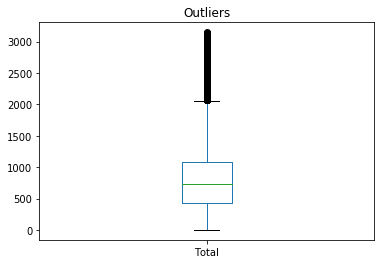

In [19]:
plt.figure(figsize=(8,8))
df_outliers.plot.box()
plt.title('Outliers')
plt.show();

In [20]:
df_19=df_outliers.groupby(['Date']).sum()

In [21]:
df_19.head()

,Total
Date,
2019-01-02,288732
2019-01-03,312162
2019-01-04,246400
2019-01-05,214133
2019-01-06,208366


In [22]:
df_19.to_csv('2019_prophet.csv')